# **Projeto: Análise de dados da UPA da Caxangá**
A análise abaixo é referente a quantidade de pacientes atendidos por dia na UPA da Caxangá

In [ ]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kurtosis
import scipy.stats as stats
#Importação das funções utilizadas

**Base de dados**

In [ ]:
# Carregando a base de dados
file_path = ('/content/Trabalho de estatística.xlsx')
df = pd.read_excel(file_path)
df.columns = ['Número de pacientes', 'Dia']


In [ ]:
#Transformando a coluna número de pacientes em uma lista
nome_colunax = 'Número de pacientes'
nome_colunay = 'Dia'
dados = df[nome_colunax].tolist()
dias = df[nome_colunay].tolist()

# Análise descritiva dos dados

**Medidas de tendência central e dispersão**

**Média**

In [ ]:
media = statistics.mean(dados)
print(f'Média = {media}')

Média = 289.14


**Mediana**

In [ ]:
mediana = statistics.median(dados)
print(f'Mediana = {mediana}')

Mediana = 258.0


**Moda**

In [ ]:
moda = statistics.mode(dados)
print(f'Moda = {moda}')

Moda = 294


**Desvio** **Padrão**

In [ ]:
desvio_padrao = statistics.stdev(dados)
print(f'Desvio Padrão = {desvio_padrao:.2f}')

Desvio Padrão = 179.27


**Variância**

In [ ]:
variancia = statistics.variance(dados)
print(f'Variância = {variancia:.2f}')

Variância = 32136.51


**Quartis**

In [ ]:
quartis = np.percentile(dados, [25, 50, 75, 100])
print(f'Quartis = {quartis[0]}, {quartis[1]}, {quartis[2]}, {quartis[3]}')


Quartis = 162.0, 258.0, 390.0, 936.0


**Curtose**

In [ ]:
curtose = kurtosis(dados)
print(f'Curtose = {curtose:.2f}')

Curtose = 1.09


**Coeficiente** **de** **variação**

In [ ]:
coeficiente_variacao = desvio_padrao / media
print(f'Coeficiente de variação = {coeficiente_variacao:.2f}')

Coeficiente de variação = 0.62


**Histograma**

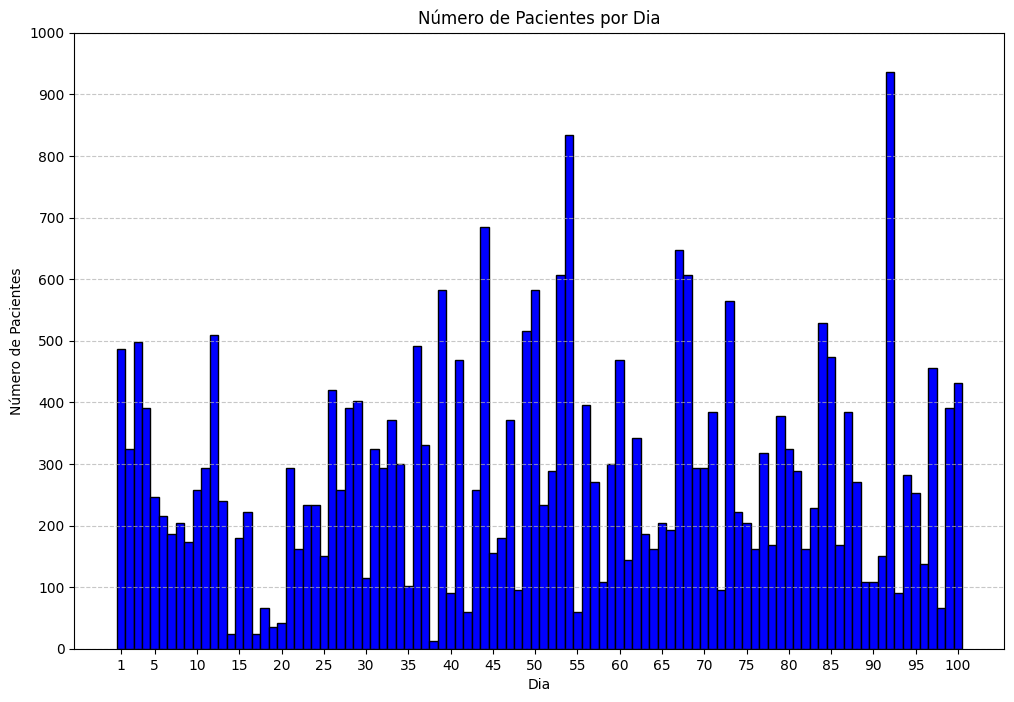

In [ ]:
plt.figure(figsize=(12, 8))

plt.bar(dias,dados, width = 1.0, color='blue', edgecolor='black')
plt.title('Número de Pacientes por Dia')
plt.xlabel('Dia')
plt.ylabel('Número de Pacientes')
plt.xticks([1] + list(range(5, 101, 5)))
plt.yticks(range(0, max(dados) + 100, 100))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**Gráfico** **de** **linhas**

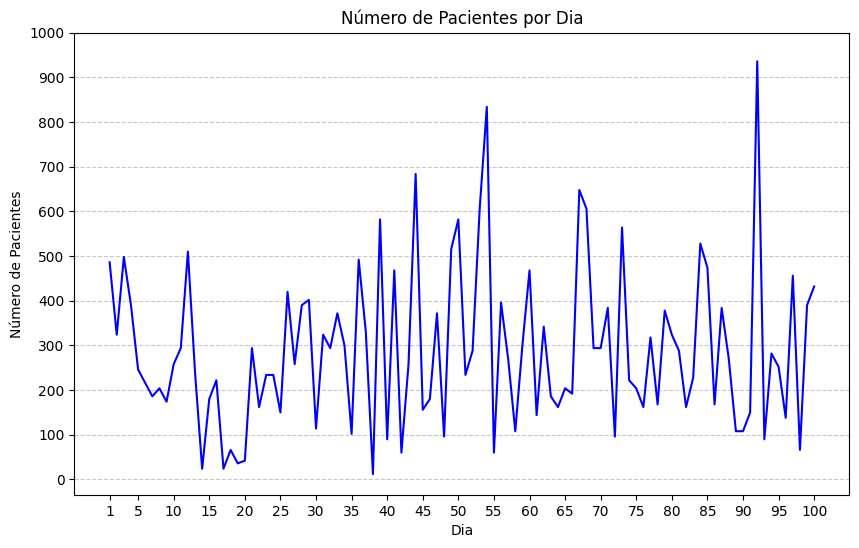

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dias, dados, color='blue')
plt.title('Número de Pacientes por Dia')
plt.xlabel('Dia')
plt.ylabel('Número de Pacientes')
plt.xticks([1] + list(range(5, 101, 5)))
plt.yticks(range(0, max(dados) + 100, 100))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Boxplot**

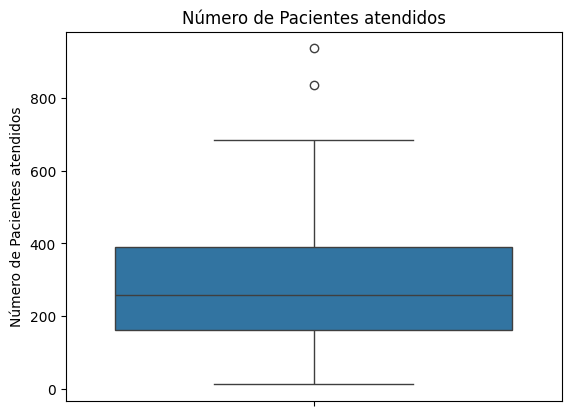

In [ ]:
sns.boxplot(dados)
plt.title('Número de Pacientes atendidos')
plt.ylabel('Número de Pacientes atendidos')
plt.show()


# Teste de normalidade



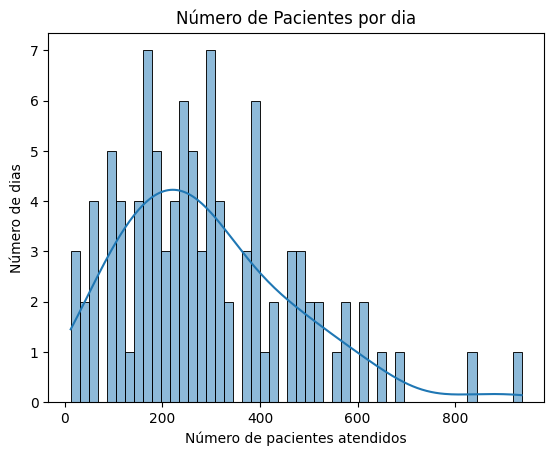

In [ ]:
# Histograma com KDE
sns.histplot(dados, kde=True, bins = 50)
plt.ylabel("Número de dias")
plt.xlabel("Número de pacientes atendidos")
plt.title("Número de Pacientes por dia")
plt.show()

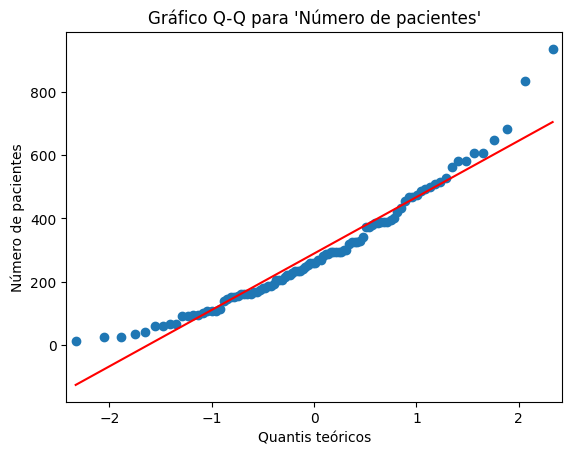

In [ ]:
# Gráfico Q-Q utilizando a função QPlot
sm.qqplot(df['Número de pacientes'], line ='s')
plt.title("Gráfico Q-Q para 'Número de pacientes'")
plt.ylabel("Número de pacientes")
plt.xlabel("Quantis teóricos")
plt.show()

In [ ]:
# Teste de normalidade de Shapiro-Wilk
shapiro_test = stats.shapiro(df['Número de pacientes'])
print("Estatística do teste de Shapiro-Wilk:", shapiro_test.statistic)
print("Valor-p do teste de Shapiro-Wilk:", shapiro_test.pvalue)

# Verificação com diferentes níveis de significância
alpha_levels = [0.05, 0.1, 0.001]

# Exibir resultados
results = []
for alpha in alpha_levels:
    if shapiro_test.pvalue < alpha:
        results.append(f'Com {alpha} de significância, rejeitamos a hipótese nula')
    else:
        results.append(f'Com {alpha} de significância, não rejeitamos a hipótese nula')

# Mostrar os resultados
for result in results:
    print(result)

Estatística do teste de Shapiro-Wilk: 0.9441161745126224
Valor-p do teste de Shapiro-Wilk: 0.0003467952903234976
Com 0.05 de significância, rejeitamos a hipótese nula
Com 0.1 de significância, rejeitamos a hipótese nula
Com 0.001 de significância, rejeitamos a hipótese nula


In [ ]:
#IDENTIFICANDO OUT LIERS
def identify_outliers(data):
    import numpy as np

    # Convert the data to a numpy array for easier manipulation
    data = np.array(data)

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers, lower_bound, upper_bound

identify_outliers(dados)

(array([834, 936]), -180.0, 732.0)

Filtraremos os dados por < 834 considerando os outliers que foram 834 e 936

In [ ]:
# Remoção dos outliers
dados_sem_out = []
for dado in dados:
  if dado < 834:
    dados_sem_out.append(dado)

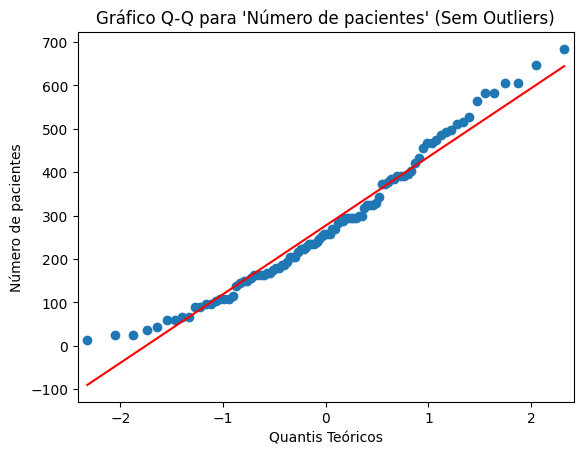

In [ ]:

# Filtrar os dados para remover os outliers
df_sem_outliers = df[(df['Número de pacientes'] < 834)]

# Criar o gráfico Q-Q usando a função qqplot do statsmodels sem os outliers
fig = sm.qqplot(df_sem_outliers['Número de pacientes'], line='s')
plt.title("Gráfico Q-Q para 'Número de pacientes' (Sem Outliers)")
plt.ylabel("Número de pacientes")
plt.xlabel("Quantis Teóricos")
plt.show()

In [ ]:
#TESTE DE NORMALIDADE SEM OUT LIERS
shapiro_test_new = stats.shapiro(dados_sem_out)
print("Estatística do teste de Shapiro-Wilk:", shapiro_test_new.statistic)
print("Valor-p do teste de Shapiro-Wilk:", shapiro_test_new.pvalue)

# Verificação com diferentes níveis de significância
alpha_levels = [0.05, 0.1, 0.01]

# Exibir resultados
results = []
for alpha in alpha_levels:
    if shapiro_test_new.pvalue < alpha:
        results.append(f'Com {alpha} de significância, rejeitamos a hipótese nula')
    else:
        results.append(f'Com {alpha} de significância, não rejeitamos a hipótese nula')

# Mostrar os resultados
for result in results:
    print(result)

Estatística do teste de Shapiro-Wilk: 0.9666334158323571
Valor-p do teste de Shapiro-Wilk: 0.0136146014334662
Com 0.05 de significância, rejeitamos a hipótese nula
Com 0.1 de significância, rejeitamos a hipótese nula
Com 0.01 de significância, não rejeitamos a hipótese nula


Os resultados do teste de Shapiro-Wilk após a remoção dos outliers mostram que, com níveis de significância de 0.05 e 0.1, os dados não seguem uma distribuição normal. No entanto, com um nível de significância de 0.01, não podemos rejeitar a hipótese nula de normalidade.

Em resumo, os dados parecem não seguir uma distribuição normal comumente aceito (níveis de significância de 0.05 e 0.1). A não rejeição da hipótese nula com 0.001 de significância sugere que a evidência contra a normalidade não é extremamente forte, mas ainda assim, é suficiente para considerar que a distribuição não é normal nos níveis de significância mais comuns (0.05 e 0.1).

Além disso, podemos dizer que os dados não seguem uma distribuição normal através da análize visual do box-plot, onde os dados não apresentam uma caixa simétrica e poucas observações fora dos "bigodes", e do histograma, pois o gráfico não apresenta uma curva em forma de sino (gaussiana).

In [ ]:
#dias com mais de 450 pessoas atendidas
dias_acima = 0
for dado in dados:
  if dado > 450:
    dias_acima += 1

print(dias_acima)

19


In [ ]:
#dias com menos de 150 pessoas atendias
dias_abaixo = 0
for dado in dados:
  if dado < 150:
    dias_abaixo += 1

print(dias_abaixo)

20
